<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/K_Means_AI_Track_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Random Data*

#Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random Data Generation

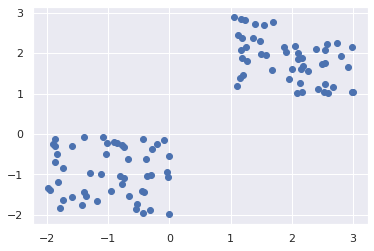

In [23]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1])
plt.show()

# Train K-Means Model

In [24]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

# Cluster Data

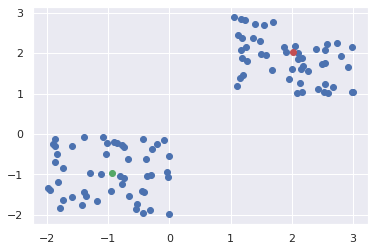

In [26]:
plt.scatter(X[ : , 0], X[ : , 1], c='b')
plt.scatter(-0.94665068, -0.97138368, c='g')
plt.scatter(2.01559419, 2.02597093, c='r')
plt.show()

In [27]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
X[1:10,:]

array([[-1.0190937 , -0.23370612],
       [-0.38372146, -0.62077265],
       [-0.45336488, -1.40080078],
       [-1.90951135, -0.23728304],
       [-1.58854682, -0.30389861],
       [-1.08778749, -0.07244149],
       [-0.66468233, -1.54167423],
       [-1.87302217, -0.12799778],
       [-0.53369096, -1.74653224]])

# Predict Group

In [34]:
sample_test=np.array([-1.0190937 , -0.23370612])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0], dtype=int32)

#Breast Cancer Diagnostic

# Import Libraries

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Load Data

In [2]:
# reading the Breast Cancer Wisconsin (Diagnostic) Data Set
df = pd.read_csv('/content/drive/MyDrive/AI Data/breastcancer.csv')

# displaying top 5 instances of the dataset
print(df.head())

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


# Drop Unnecessary columns

In [3]:
# the unwanted columns, 'id' and 'Unnamed: 32' are dropped
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

# Binary Conversion

In [4]:
# label-encoding of the target label, 'diagnosis' such that B(Benign) -> 0 and M (Malignant) -> 1
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

# Data Split

In [15]:
# spliting into X (features) and y (target label)
X = df.iloc[:, 1:]
y = df['diagnosis']
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Normalization

In [6]:
# feature scaling
X_scaled = StandardScaler().fit_transform(X)

# Dimensionality Reduction Using PCA

In [7]:
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
pca = IncrementalPCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# Data Visualization

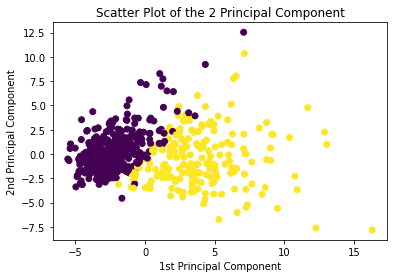

In [11]:
# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = y)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot of the 2 Principal Component')
plt.show()

# K-Means Training

In [12]:
# k-Means Clustering with 2 clusters as there are 2 labels
model = KMeans(n_clusters = 2).fit(X_pca)


# Cluster Prediction

In [14]:
y_cluster = model.predict(X_pca)
y_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

# Model Performance

In [16]:
# Getting the Accuracy of the k-Means Clustering Model
print('Accuracy of the Model: ', metrics.accuracy_score(y, y_cluster))
print()

# Getting the Precision of the k-Means Clustering Model
print('Precision of the Model: ', metrics.precision_score(y, y_cluster))
print()

# Getting the Recall of the k-Means Clustering Model
print('Recall of the Model: ', metrics.recall_score(y, y_cluster))
print()

# Getting the F1-Score of the k-Means Clustering Model
print('F1-Score of the Model: ', metrics.f1_score(y, y_cluster))
print()

Accuracy of the Model:  0.9068541300527241

Precision of the Model:  0.9162303664921466

Recall of the Model:  0.8254716981132075

F1-Score of the Model:  0.8684863523573201



# Thank You